In [1]:
import numpy as np
import matplotlib as mat
import os
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import scvelo as scv
import multivelo as mv

Global seed set to 0


In [2]:
scv.__version__

'0.3.1'

In [2]:
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.set_figure_params('scvelo')
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
np.set_printoptions(suppress=True)

In [4]:
#Preprocessing the ATAC 
sampleID = ['Gan44','Gan45','Gan47','Gan48','Gan49','Gan50','Gan129','Gan134','Gan134v2','Gan137','Gan137v2']


i = 0
for sample in sampleID: 
    i = i+1
    matrix_path = f'/athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_{sample}/outs/filtered_feature_bc_matrix/'
    print(f'reading ATAC input from the mtx path : {matrix_path}')
    adata_atac = sc.read_10x_mtx(matrix_path, var_names='gene_symbols', cache=True, gex_only=False)
    adata_atac = adata_atac[:,adata_atac.var['feature_types'] == "Peaks"]
    adata_atac = mv.aggregate_peaks_10x(adata_atac,
                                    f'/athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_{sample}/outs/peak_annotation.tsv',
                                    f'/athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_{sample}/outs/analysis/feature_linkage/feature_linkage.bedpe',
                                    verbose=True)
    mv.tfidf_norm(adata_atac)
    # subset the annotated cells from ATAC assay 
    cell_anno_path = f'/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/{sample}_celltype_annotation.txt'
    cell_annot = pd.read_csv(cell_anno_path,sep = "\t",index_col=0)
    shared_cells_anno = pd.Index(np.intersect1d(adata_atac.obs_names, cell_annot.index))
    adata_atac = adata_atac[shared_cells_anno,:]
       adata_atac.obs_names = [f'{sample}_' + x for x in adata_atac.obs_names]
    adata_atac.var_names_make_unique()
  
    if i == 1: adata_atac_all = adata_atac
    if i > 1:
        adata_atac_all = adata_atac_all.concatenate(adata_atac)

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan44/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 2.0.0
Found 14607 genes with promoter peaks


  0%|          | 0/14607 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan45/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 18931 genes with promoter peaks


  0%|          | 0/18931 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan47/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 16601 genes with promoter peaks


  0%|          | 0/16601 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan48/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 18557 genes with promoter peaks


  0%|          | 0/18557 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan49/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 16834 genes with promoter peaks


  0%|          | 0/16834 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan50/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 1.0.0
Found 17284 genes with promoter peaks


  0%|          | 0/17284 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan129/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 2.0.0
Found 14647 genes with promoter peaks


  0%|          | 0/14647 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan134/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 2.0.0
Found 18639 genes with promoter peaks


  0%|          | 0/18639 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan134v2/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 2.0.0
Found 20116 genes with promoter peaks


  0%|          | 0/20116 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan137/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 2.0.0
Found 14260 genes with promoter peaks


  0%|          | 0/14260 [00:00<?, ?it/s]

reading ATAC input from the mtx path : /athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/cellranger/MO_Gan137v2/outs/filtered_feature_bc_matrix/
CellRanger ARC identified as 2.0.0
Found 13634 genes with promoter peaks


  0%|          | 0/13634 [00:00<?, ?it/s]

sample

In [5]:
adata_atac_all

AnnData object with n_obs × n_vars = 40558 × 12227
    obs: 'batch'

In [6]:
adata_atac_all.obs

batch
Gan44_AAACATGCAAGCGAGC-1-0-0-0-0-0-0-0-0-0-0     0
Gan44_AAACATGCATGTTGCA-1-0-0-0-0-0-0-0-0-0-0     0
Gan44_AAACCGAAGCATGTCG-1-0-0-0-0-0-0-0-0-0-0     0
Gan44_AAACCGCGTGAGACTC-1-0-0-0-0-0-0-0-0-0-0     0
Gan44_AAACCGCGTGTTTGTC-1-0-0-0-0-0-0-0-0-0-0     0
...                                            ...
Gan137v2_TTTGCGGAGTCATTAG-1-1                    1
Gan137v2_TTTGTCTAGCCTCTCG-1-1                    1
Gan137v2_TTTGTCTAGGCTAGAA-1-1                    1
Gan137v2_TTTGTGTTCCCGCAAA-1-1                    1
Gan137v2_TTTGTGTTCCTTGCAC-1-1                    1

[40558 rows x 1 columns]

In [7]:
### rename the index (cellid) after concatenation
adata_atac_all.obs_names = [x.split('-')[0][:] + '-1' for x in adata_atac_all.obs_names]

In [8]:
adata_atac_all.obs

batch
Gan44_AAACATGCAAGCGAGC-1        0
Gan44_AAACATGCATGTTGCA-1        0
Gan44_AAACCGAAGCATGTCG-1        0
Gan44_AAACCGCGTGAGACTC-1        0
Gan44_AAACCGCGTGTTTGTC-1        0
...                           ...
Gan137v2_TTTGCGGAGTCATTAG-1     1
Gan137v2_TTTGTCTAGCCTCTCG-1     1
Gan137v2_TTTGTCTAGGCTAGAA-1     1
Gan137v2_TTTGTGTTCCCGCAAA-1     1
Gan137v2_TTTGTGTTCCTTGCAC-1     1

[40558 rows x 1 columns]

In [9]:
adata_atac_all.write('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_adata_ATAC_raw.h5ad')

In [27]:
#sampleID = ['Gan45','Gan47','Gan48','Gan49','Gan50','Gan60','Gan61','Gan62','Gan63','Gan64','Gan66']
#sampleID = ['Gan60','Gan61','Gan62','Gan63','Gan64','Gan66','Gan147']
#sampleID = ['Gan59','Gan60','Gan61','Gan62','Gan63','Gan64','Gan66','Gan142','Gan142v2','Gan144','Gan144v2','Gan147']

sampleID = ['Gan44','Gan45','Gan47','Gan48','Gan49','Gan50','Gan129','Gan134','Gan134v2','Gan137','Gan137v2']

i = 0
for sample in sampleID: 
    i = i+1
    loom_path = f'/athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_19samples_loom/{sample}.loom'
    cell_anno_path = f'/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/{sample}_celltype_annotation.txt'
    print(f'loom file path is {loom_path}')
    print(f'cell annotation file path is {cell_anno_path}')
    adata_rna = scv.read(loom_path, cache=True)
    adata_rna.obs_names = [x.split(':')[1][:-1] + '-1' for x in adata_rna.obs_names]
    cell_annot = pd.read_csv(cell_anno_path,sep = "\t",index_col=0)
    ## subset annotated cells from RNA assay
    shared_cells_anno = pd.Index(np.intersect1d(adata_rna.obs_names, cell_annot.index))
    adata_rna = adata_rna[shared_cells_anno,:]
    ## assign celltypes
    adata_rna.obs['celltype'] = cell_annot['celltype']
    ### rename cells with sampleID
    adata_rna.obs_names = [f'{sample}_' + x for x in adata_rna.obs_names]
    adata_rna.var_names_make_unique()

    if i == 1: adata_rna_all = adata_rna
    # concatenate the three loom
    if i > 1:
        adata_rna_all = adata_rna_all.concatenate(adata_rna)


loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_19samples_loom/Gan44.loom
cell annotation file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/Gan44_celltype_annotation.txt
loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_19samples_loom/Gan45.loom
cell annotation file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/Gan45_celltype_annotation.txt
loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_19samples_loom/Gan47.loom
cell annotation file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/Gan47_celltype_annotation.txt
loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_19samples_loom/Gan48.loom
cell annotation file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/Gan48_celltype_annotation.txt
loom file path is /athena/tilgnerlab/scratch/weh4002/Multivelo/velocyto/all_19samples_loom/Gan49.loom
cell annotation file path is /athena/tilgnerlab/scratch/we

In [28]:
adata_rna_all.obs_names

Index(['Gan44_AAACATGCAAGCGAGC-1-0-0-0-0-0-0-0-0-0-0',
       'Gan44_AAACATGCATGTTGCA-1-0-0-0-0-0-0-0-0-0-0',
       'Gan44_AAACCGAAGCATGTCG-1-0-0-0-0-0-0-0-0-0-0',
       'Gan44_AAACCGCGTGAGACTC-1-0-0-0-0-0-0-0-0-0-0',
       'Gan44_AAACCGCGTGTTTGTC-1-0-0-0-0-0-0-0-0-0-0',
       'Gan44_AAACCGGCAACTGGGA-1-0-0-0-0-0-0-0-0-0-0',
       'Gan44_AAACCGGCATCCCTCA-1-0-0-0-0-0-0-0-0-0-0',
       'Gan44_AAACCGGCATTGTCAG-1-0-0-0-0-0-0-0-0-0-0',
       'Gan44_AAACGCGCAACACCTA-1-0-0-0-0-0-0-0-0-0-0',
       'Gan44_AAACGCGCAGGCATCT-1-0-0-0-0-0-0-0-0-0-0',
       ...
       'Gan137v2_TTTCCTGAGCACGTTG-1-1', 'Gan137v2_TTTCCTGAGCTGAGGG-1-1',
       'Gan137v2_TTTGACTTCCACCTGT-1-1', 'Gan137v2_TTTGCATTCATGTGGT-1-1',
       'Gan137v2_TTTGCGACATAAGTCT-1-1', 'Gan137v2_TTTGCGGAGTCATTAG-1-1',
       'Gan137v2_TTTGTCTAGCCTCTCG-1-1', 'Gan137v2_TTTGTCTAGGCTAGAA-1-1',
       'Gan137v2_TTTGTGTTCCCGCAAA-1-1', 'Gan137v2_TTTGTGTTCCTTGCAC-1-1'],
      dtype='object', length=40558)

In [29]:
### rename the index (cellid) after concatenation
adata_rna_all.obs_names = [x.split('-')[0][:] + '-1' for x in adata_rna_all.obs_names]

In [30]:
adata_rna_all.obs

celltype batch
Gan44_AAACATGCAAGCGAGC-1         ExN     0
Gan44_AAACATGCATGTTGCA-1         ExN     0
Gan44_AAACCGAAGCATGTCG-1        OLIG     0
Gan44_AAACCGCGTGAGACTC-1         ASC     0
Gan44_AAACCGCGTGTTTGTC-1         ASC     0
...                              ...   ...
Gan137v2_TTTGCGGAGTCATTAG-1     ENDC     1
Gan137v2_TTTGTCTAGCCTCTCG-1     OLIG     1
Gan137v2_TTTGTCTAGGCTAGAA-1     OLIG     1
Gan137v2_TTTGTGTTCCCGCAAA-1     OLIG     1
Gan137v2_TTTGTGTTCCTTGCAC-1     OLIG     1

[40558 rows x 2 columns]

In [31]:
adata_rna_all.write('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_adata_RNA_raw.h5ad')

In [32]:
scv.pp.filter_and_normalize(adata_rna_all, min_shared_counts=10)

Filtered out 22953 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.


/home/weh4002/anaconda3/envs/multivelo/lib/python3.8/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Logarithmized X.


In [33]:
adata_rna_all

AnnData object with n_obs × n_vars = 40558 × 13648
    obs: 'celltype', 'batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr'
    uns: 'log1p'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [34]:
## import the genes tested for dPSI
PSI_genes = pd.Index(pd.read_csv("/athena/tilgnerlab/scratch/weh4002/Human_AD_Multiome/delta_PSI_case_control_19samples/celltypes_tested_symbol", header=None)[0])

In [35]:
PSI_genes

Index(['AAK1', 'ABAT', 'ABCA10', 'ABCA5', 'ABCB9', 'ABCC1', 'ABHD11', 'ABHD12',
       'ABHD6', 'ABI1',
       ...
       'ZNF567', 'ZNF568', 'ZNF573', 'ZNF615', 'ZNF638', 'ZNF706', 'ZNF711',
       'ZRANB3', 'ZSWIM7', 'ZYX'],
      dtype='object', name=0, length=1874)

In [36]:
shared_cells = pd.Index(np.intersect1d(adata_rna_all.obs_names, adata_atac_all.obs_names))
shared_genes_assay = pd.Index(np.intersect1d(adata_rna_all.var_names, adata_atac_all.var_names))

In [37]:
len(shared_cells), len(shared_genes_assay)

(40558, 9040)

In [38]:
## find the shared genes between RNA-ATAC assays and dPSI tested genes
shared_genes = pd.Index(np.intersect1d(shared_genes_assay, PSI_genes))

In [39]:
shared_genes

Index(['AAK1', 'ABAT', 'ABCA5', 'ABCB9', 'ABCC1', 'ABHD12', 'ABHD6', 'ABI1',
       'ABI2', 'ABL2',
       ...
       'ZNF484', 'ZNF532', 'ZNF568', 'ZNF573', 'ZNF615', 'ZNF638', 'ZNF706',
       'ZRANB3', 'ZSWIM7', 'ZYX'],
      dtype='object', length=1448)

In [40]:
### reload rna assay
adata_rna_all = sc.read_h5ad("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_adata_RNA_raw.h5ad")

In [41]:
adata_rna_all

AnnData object with n_obs × n_vars = 40558 × 36601
    obs: 'celltype', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [42]:
## subset the shared_cells and shared_genes from whole assay
adata_rna = adata_rna_all[shared_cells, shared_genes]

In [43]:
adata_rna

View of AnnData object with n_obs × n_vars = 40558 × 1448
    obs: 'celltype', 'batch'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [44]:
adata_rna.var_names_make_unique()

In [45]:
scv.pp.normalize_per_cell(adata_rna)
scv.pp.log1p(adata_rna)

Normalized count data: X, spliced, unspliced.


/scratchLocal/weh4002_11438656/ipykernel_59510/2089892543.py:2: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  scv.pp.log1p(adata_rna)


In [46]:
scv.pp.moments(adata_rna, n_pcs=30, n_neighbors=50)

computing neighbors
    finished (0:00:49) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:08) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [47]:
adata_rna.obs['celltype'] = adata_rna.obs['celltype'].astype('category')

In [48]:
adata_rna.obs['celltype']

Gan129_AAACAGCCAGAGGGAG-1     ExN
Gan129_AAACCAACAGCAGGTA-1    OLIG
Gan129_AAACCGCGTGCGCAAT-1    OLIG
Gan129_AAACCGGCAACACTTG-1     ExN
Gan129_AAACCGGCAAGCTTTG-1      MG
                             ... 
Gan50_TTTGTCTAGAATCTCA-1      ASC
Gan50_TTTGTCTAGTTTCCTG-1       MG
Gan50_TTTGTGGCAGATTCAT-1     OLIG
Gan50_TTTGTGTTCCCTCAGT-1      InN
Gan50_TTTGTTGGTAAGCACC-1     OLIG
Name: celltype, Length: 40558, dtype: category
Categories (11, object): ['ASC', 'ENDC', 'ExN', 'FB', ..., 'OPC', 'TC', 'VENC', 'VLMC']

In [49]:
adata_rna = adata_rna[adata_rna.obs['celltype'].isin(['ASC',
                                                      'ExN',
                                                      'InN',
                                                      'MG',
                                                      'OLIG',
                                                      'OPC'])]

In [50]:
adata_rna

View of AnnData object with n_obs × n_vars = 39898 × 1448
    obs: 'celltype', 'batch', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'log1p', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'

In [44]:
#os.mkdir("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/")

saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/all_9Cases_spliced.unpliced_proportions_dPSIgenes.pdf


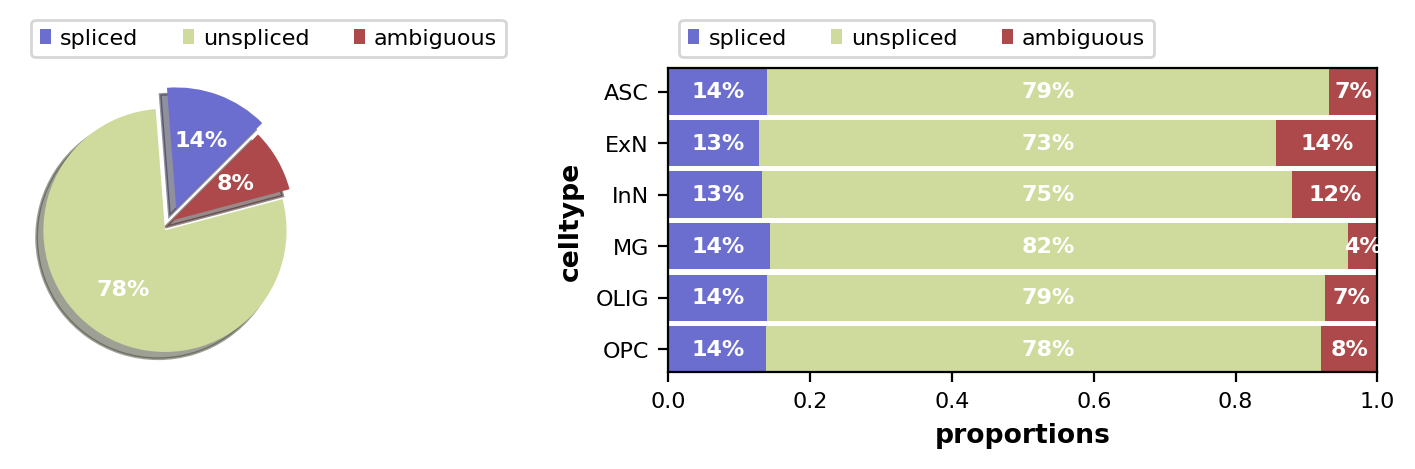

In [51]:
scv.pl.proportions(adata_rna, groupby='celltype',save='/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/all_9Cases_spliced.unpliced_proportions_dPSIgenes.pdf' )

saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_adata_rna_umap_dPSI_genes.pdf


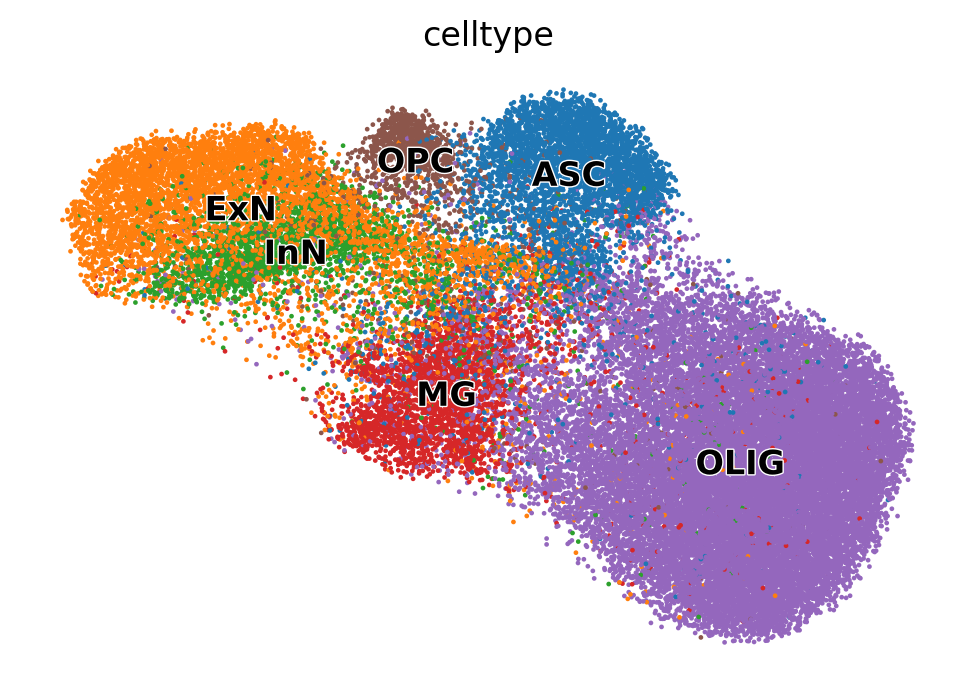

In [52]:
scv.tl.umap(adata_rna)
scv.pl.umap(adata_rna, color='celltype',save = "/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_adata_rna_umap_dPSI_genes.pdf")

saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_adata_rna_umap_dPSI_genes_v2.pdf


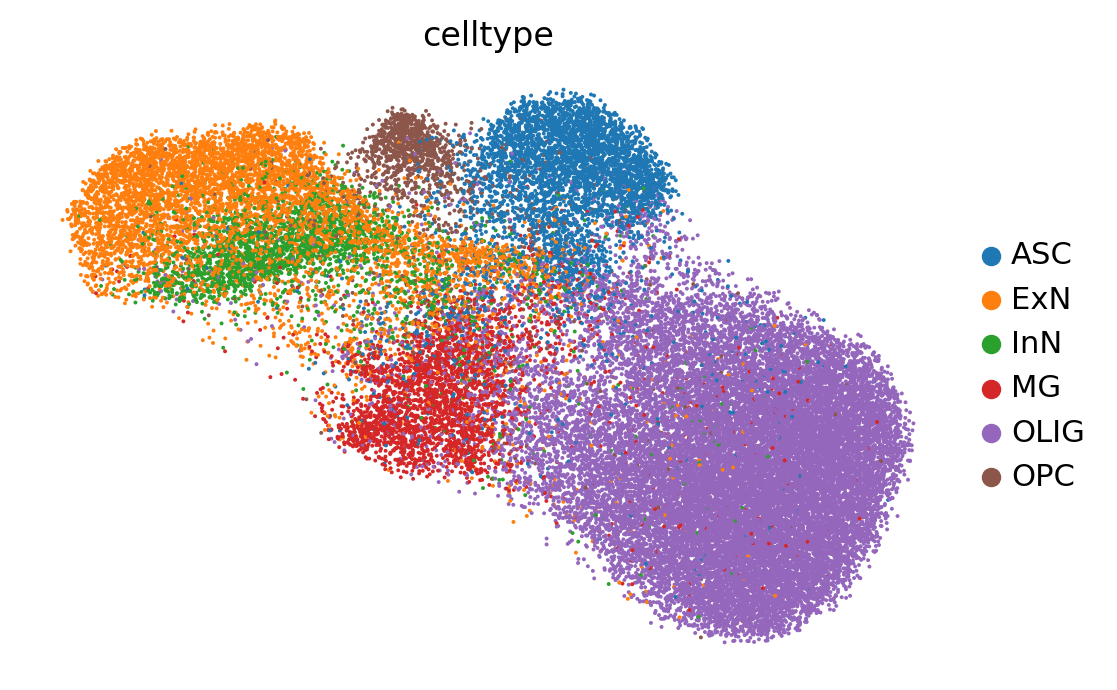

In [53]:
scv.pl.umap(adata_rna, color='celltype',size = 8, legend_loc='right margin',save = "/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_adata_rna_umap_dPSI_genes_v2.pdf")

In [54]:
adata_rna.write('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_adata_rna.dPSIgenes.celltype.filtered_normalized.h5ad')

In [55]:
# Read in Seurat WNN neighbors.
nn_idx = np.loadtxt("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/merge_wnn_files/case_9samples/case_nn_idx.txt", delimiter=',')
nn_dist = np.loadtxt("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/merge_wnn_files/case_9samples/case_nn_dist.txt", delimiter=',')
nn_cells = pd.Index(pd.read_csv("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/merge_wnn_files/case_9samples/case_nn_cells.txt", header=None)[0])


In [56]:
nn_cells

Index(['Gan44_AAACATGCAAGCGAGC-1', 'Gan44_AAACATGCATGTTGCA-1',
       'Gan44_AAACCGAAGCATGTCG-1', 'Gan44_AAACCGCGTGAGACTC-1',
       'Gan44_AAACCGCGTGTTTGTC-1', 'Gan44_AAACCGGCAACTGGGA-1',
       'Gan44_AAACCGGCATCCCTCA-1', 'Gan44_AAACCGGCATTGTCAG-1',
       'Gan44_AAACGCGCAACACCTA-1', 'Gan44_AAACGCGCAGGCATCT-1',
       ...
       'Gan137v2_TTTCCTGAGCACGTTG-1', 'Gan137v2_TTTCCTGAGCTGAGGG-1',
       'Gan137v2_TTTGACTTCCACCTGT-1', 'Gan137v2_TTTGCATTCATGTGGT-1',
       'Gan137v2_TTTGCGACATAAGTCT-1', 'Gan137v2_TTTGCGGAGTCATTAG-1',
       'Gan137v2_TTTGTCTAGCCTCTCG-1', 'Gan137v2_TTTGTCTAGGCTAGAA-1',
       'Gan137v2_TTTGTGTTCCCGCAAA-1', 'Gan137v2_TTTGTGTTCCTTGCAC-1'],
      dtype='object', name=0, length=40558)

In [57]:
np.all(nn_cells == adata_atac_all.obs_names)

True

In [58]:
adata_atac_all.obs_names

Index(['Gan44_AAACATGCAAGCGAGC-1', 'Gan44_AAACATGCATGTTGCA-1',
       'Gan44_AAACCGAAGCATGTCG-1', 'Gan44_AAACCGCGTGAGACTC-1',
       'Gan44_AAACCGCGTGTTTGTC-1', 'Gan44_AAACCGGCAACTGGGA-1',
       'Gan44_AAACCGGCATCCCTCA-1', 'Gan44_AAACCGGCATTGTCAG-1',
       'Gan44_AAACGCGCAACACCTA-1', 'Gan44_AAACGCGCAGGCATCT-1',
       ...
       'Gan137v2_TTTCCTGAGCACGTTG-1', 'Gan137v2_TTTCCTGAGCTGAGGG-1',
       'Gan137v2_TTTGACTTCCACCTGT-1', 'Gan137v2_TTTGCATTCATGTGGT-1',
       'Gan137v2_TTTGCGACATAAGTCT-1', 'Gan137v2_TTTGCGGAGTCATTAG-1',
       'Gan137v2_TTTGTCTAGCCTCTCG-1', 'Gan137v2_TTTGTCTAGGCTAGAA-1',
       'Gan137v2_TTTGTGTTCCCGCAAA-1', 'Gan137v2_TTTGTGTTCCTTGCAC-1'],
      dtype='object', length=40558)

In [59]:
adata_atac_all

AnnData object with n_obs × n_vars = 40558 × 12227
    obs: 'batch'

In [60]:
mv.knn_smooth_chrom(adata_atac_all, nn_idx, nn_dist)

In [61]:
shared_cells_new = pd.Index(np.intersect1d(adata_rna.obs_names, adata_atac_all.obs_names))

In [62]:
shared_cells_new

Index(['Gan129_AAACAGCCAGAGGGAG-1', 'Gan129_AAACCAACAGCAGGTA-1',
       'Gan129_AAACCGCGTGCGCAAT-1', 'Gan129_AAACCGGCAACACTTG-1',
       'Gan129_AAACCGGCAAGCTTTG-1', 'Gan129_AAACGCGCAGGACACA-1',
       'Gan129_AAACGGATCCCGAAGC-1', 'Gan129_AAACGTACAATGAGGT-1',
       'Gan129_AAAGCCCGTTATCCGT-1', 'Gan129_AAAGCCGCAACTGGGA-1',
       ...
       'Gan50_TTTGGTAAGTCATCCC-1', 'Gan50_TTTGGTGCAGGACCTT-1',
       'Gan50_TTTGTCCCAACAACAA-1', 'Gan50_TTTGTCCCACAGAAAC-1',
       'Gan50_TTTGTCTAGAACAAGT-1', 'Gan50_TTTGTCTAGAATCTCA-1',
       'Gan50_TTTGTCTAGTTTCCTG-1', 'Gan50_TTTGTGGCAGATTCAT-1',
       'Gan50_TTTGTGTTCCCTCAGT-1', 'Gan50_TTTGTTGGTAAGCACC-1'],
      dtype='object', length=39898)

In [63]:
adata_atac = adata_atac_all[shared_cells_new, shared_genes]

In [64]:
adata_atac

View of AnnData object with n_obs × n_vars = 39898 × 1448
    obs: 'batch'
    layers: 'Mc'
    obsp: 'connectivities'

In [65]:
adata_atac.write('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_adata_atac.dPSIgenes.celltype.filtered_knn.smooth.h5ad')

In [4]:
### reload  assay
adata_atac = sc.read_h5ad("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_adata_atac.dPSIgenes.celltype.filtered_knn.smooth.h5ad")

In [5]:
### reload rna assay
adata_rna = sc.read_h5ad("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_adata_rna.dPSIgenes.celltype.filtered_normalized.h5ad")

In [6]:
adata_rna

AnnData object with n_obs × n_vars = 39898 × 1448
    obs: 'celltype', 'batch', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    uns: 'celltype_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [7]:
adata_atac

AnnData object with n_obs × n_vars = 39898 × 1448
    obs: 'batch'
    layers: 'Mc'
    obsp: 'connectivities'

In [8]:
# This will take a while. Parallelization is high recommended.
#mv.settings.VERBOSITY = 0
adata_result = mv.recover_dynamics_chrom(adata_rna,
                                         adata_atac,
                                         max_iter=5,
                                         init_mode="invert",
                                         parallel=True,
                                         save_plot=False,
                                         rna_only=False,
                                         fit=True,
                                         n_anchors=500,
                                         extra_color_key='celltype'
                                        )

  0%|          | 0/1448 [00:00<?, ?it/s]

Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed set to 0
Global seed s

In [9]:
adata_result

AnnData object with n_obs × n_vars = 39898 × 1445
    obs: 'celltype', 'batch', 'n_counts'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'fit_alpha_c', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_alignment_scaling', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_u0', 'fit_s0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_genes', 'velo_u_genes', 'velo_chrom_genes'
    uns: 'celltype_colors', 'log1p', 'neighbors', 'pca', 'umap', 'velo_s_params', 'velo_u_params', 'velo_chrom_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs', 'fit_anchor_c', 'fit_anchor_u', 'fit_anchor_s', 'fit_anchor_c_sw', 'fit_anchor_u_sw', 'fit_anchor_s_sw', 'fit_anchor_c_velo', 'fit_anchor_u_velo', 'fit_anchor_s_velo'
    layers: 'Ms', 'Mu', 'ambiguous', 'matrix', 'spliced', 'unspl

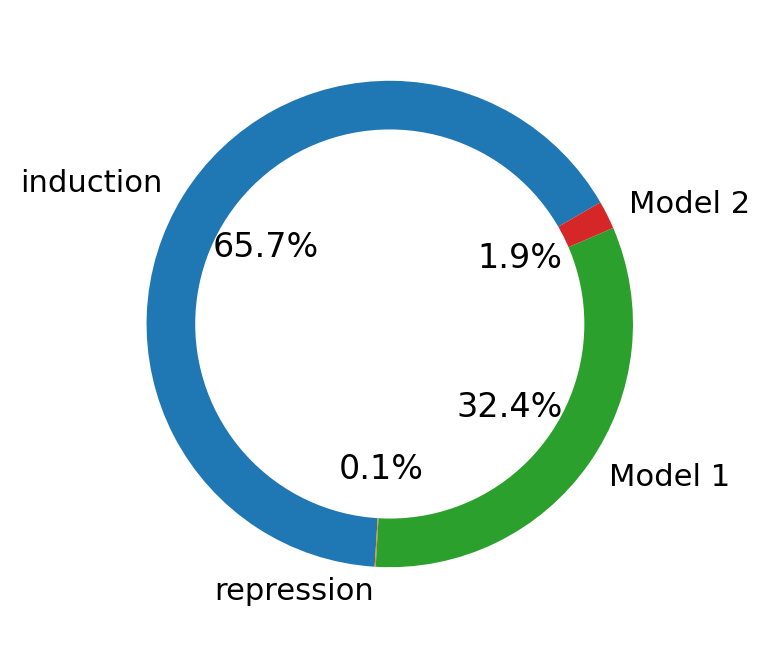

In [10]:
mv.pie_summary(adata_result)

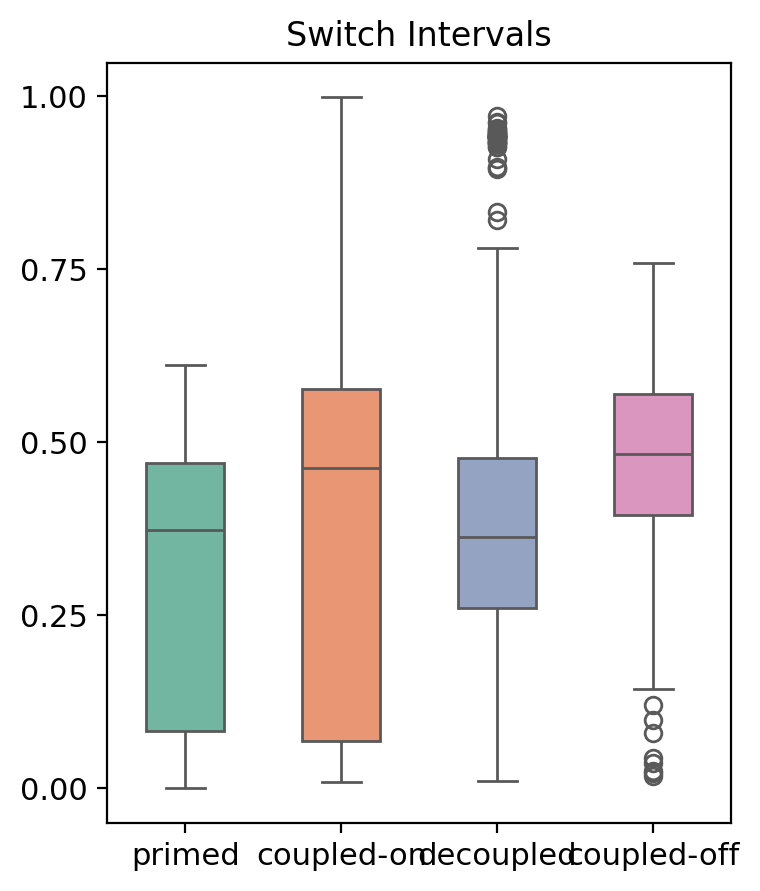

In [11]:
mv.switch_time_summary(adata_result)

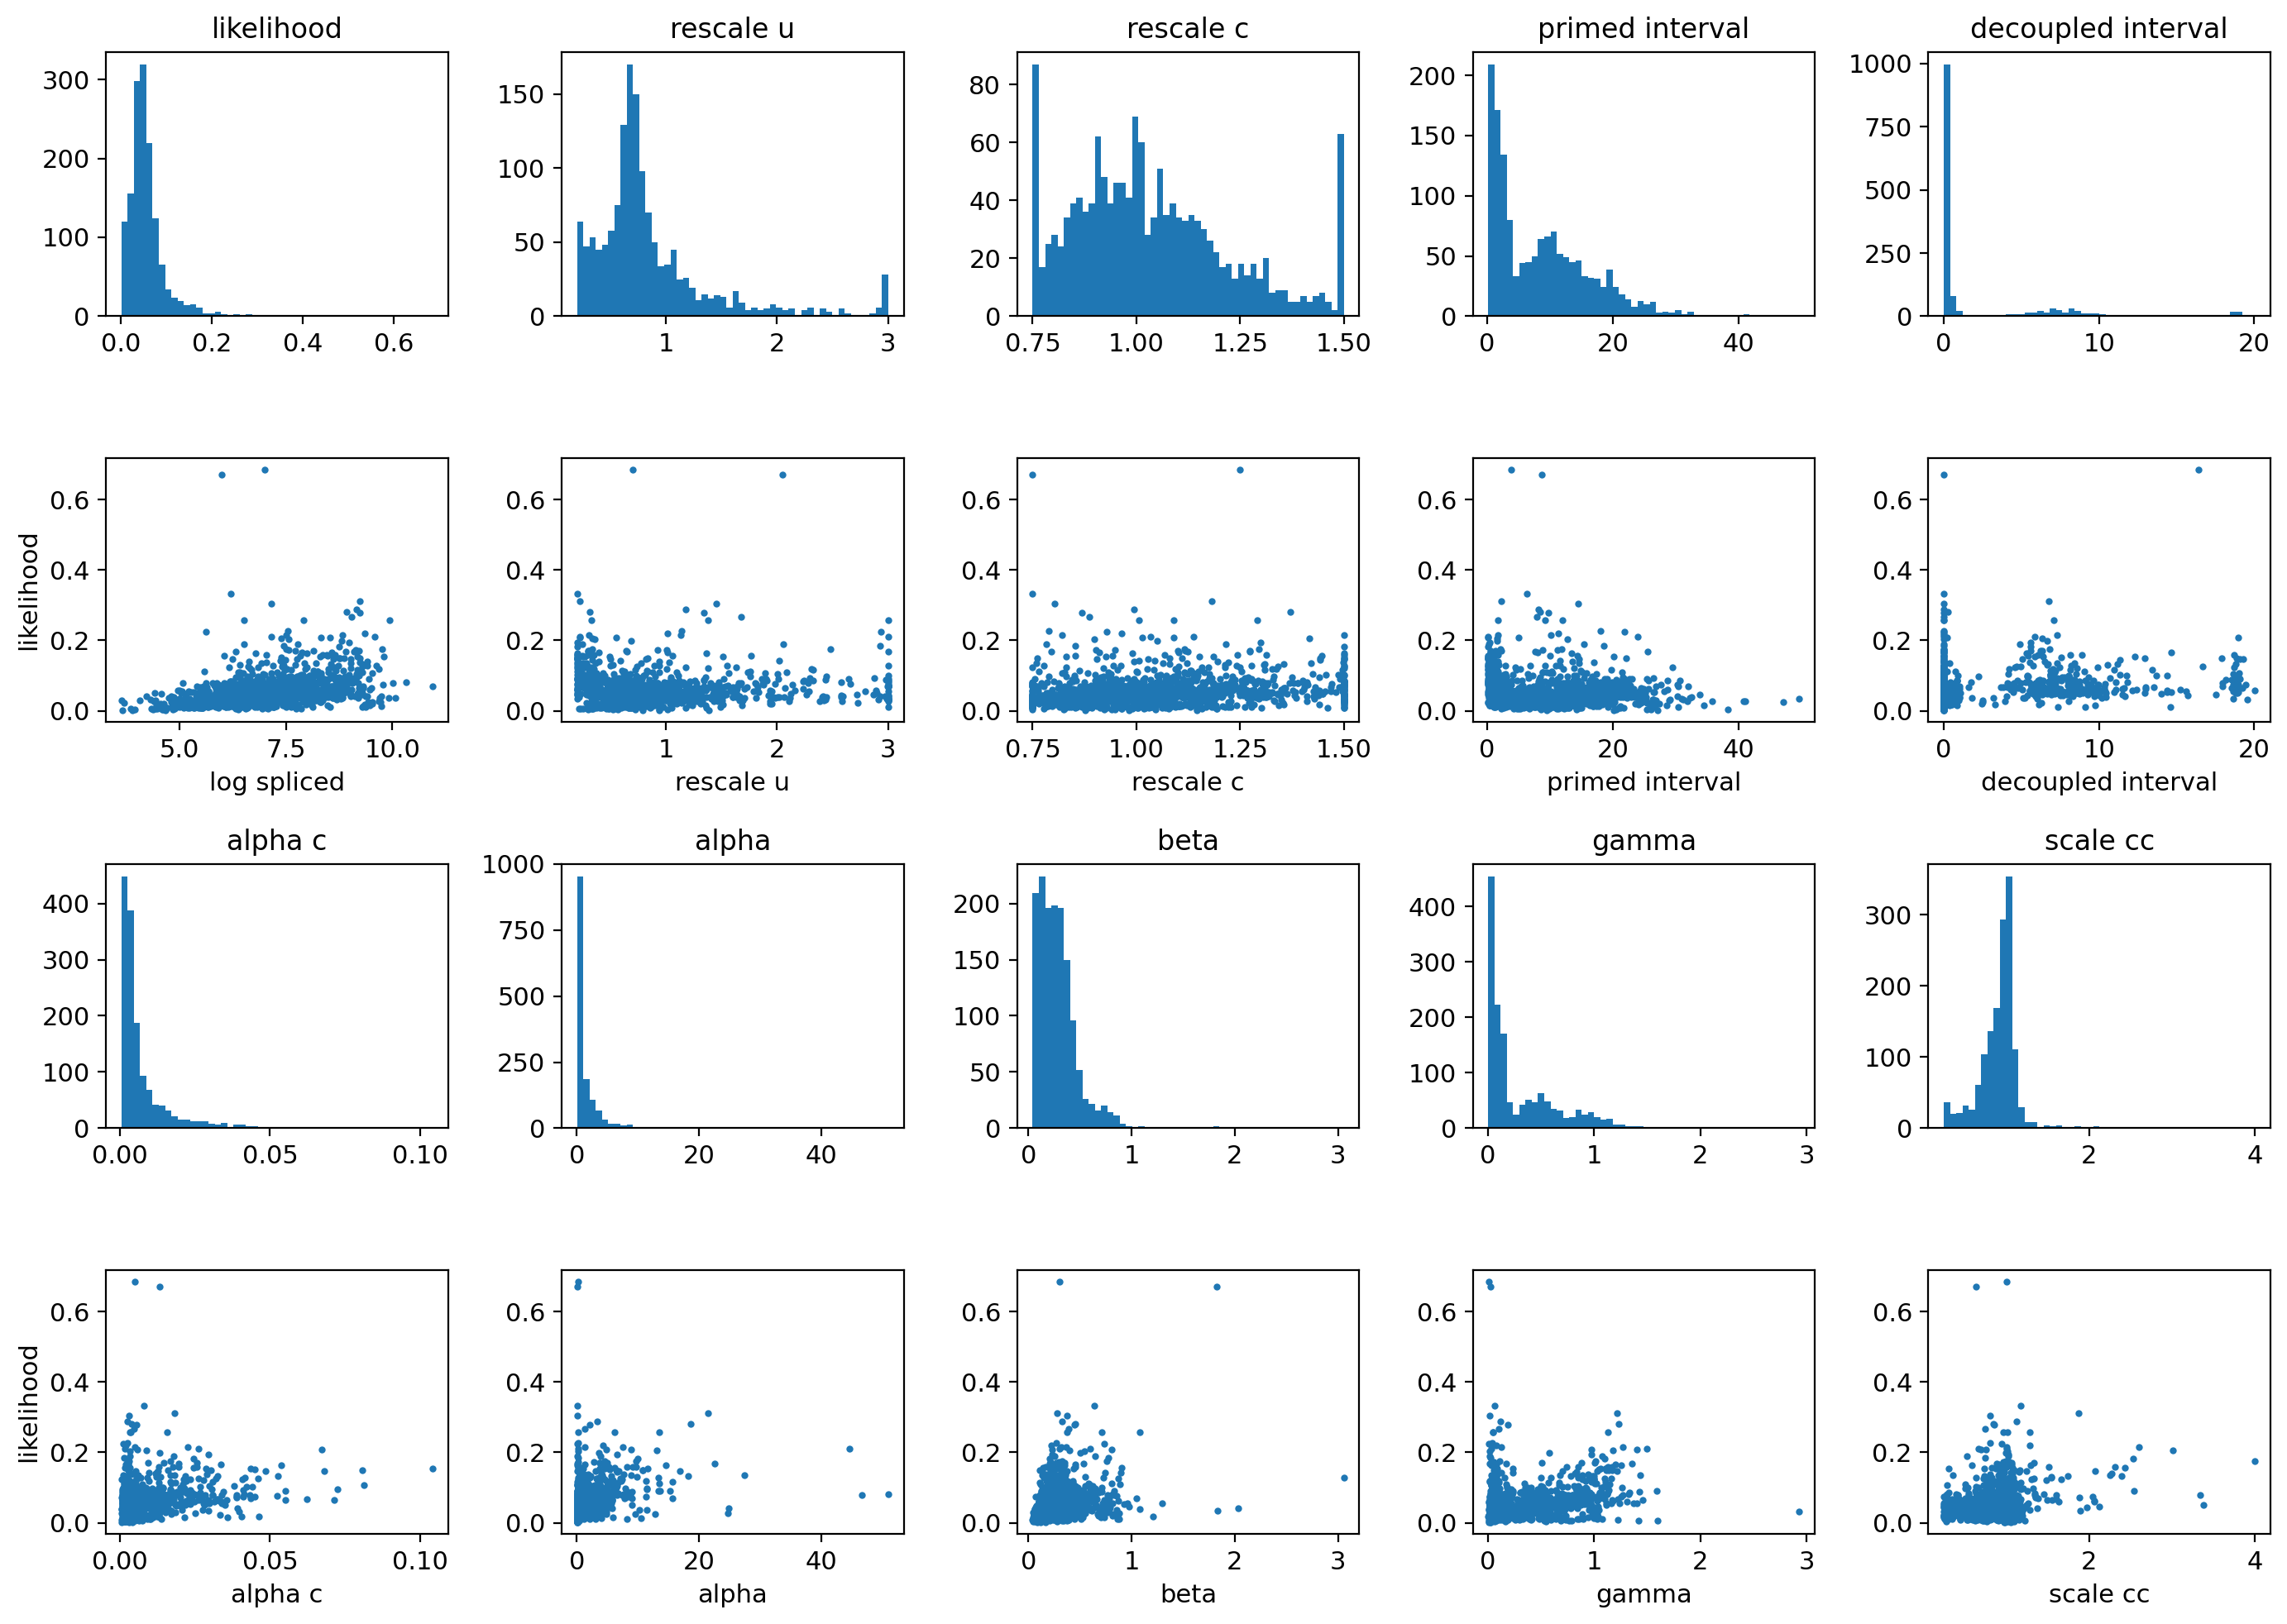

In [12]:
mv.likelihood_plot(adata_result)

In [13]:
#Computing velocity stream and latent time
mv.velocity_graph(adata_result)
mv.latent_time(adata_result)

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing velocity graph (using 1/56 cores)


  0%|          | 0/39898 [00:00<?, ?cells/s]

    finished (0:00:26) --> added 
    'velo_s_norm_graph', sparse matrix with cosine correlations (adata.uns)
or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing terminal states
    identified 10 regions of root cells and 4 regions of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:15) --> added 
    'latent_time', shared time (adata.obs)


computing velocity embedding
    finished (0:00:11) --> added
    'velo_s_norm_umap', embedded velocity vectors (adata.obsm)
saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_multivelo_velocity_stream_dPSItested_genes.pdf


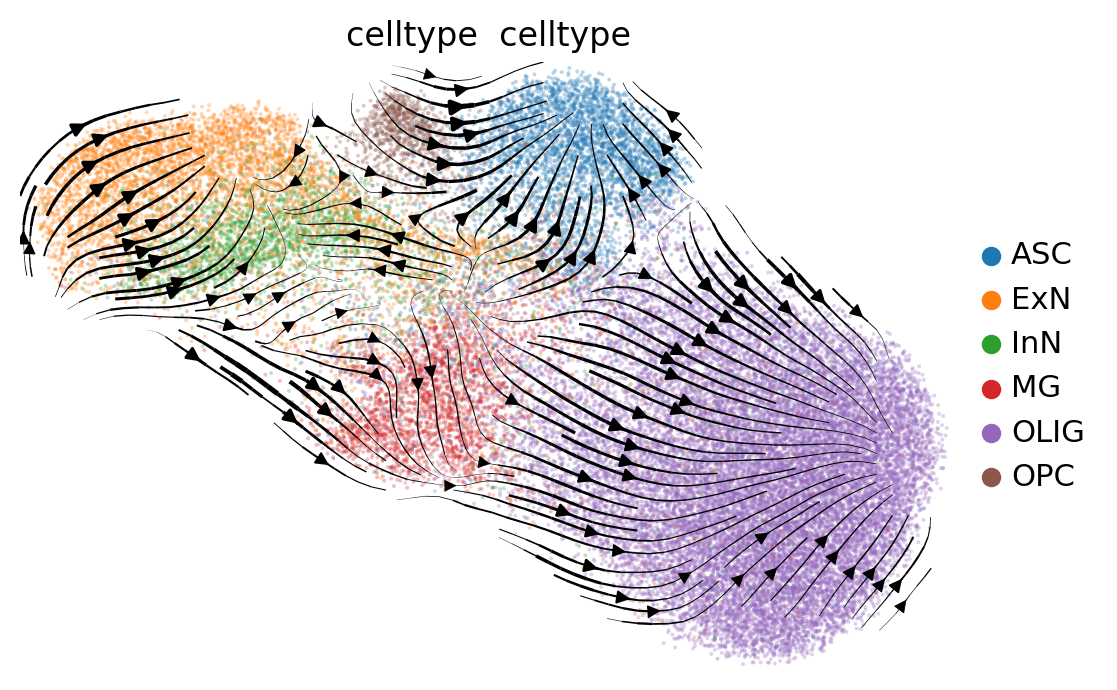

In [14]:
mv.velocity_embedding_stream(adata_result, basis='umap', color='celltype',size = 8, legend_loc='right margin',layer='celltype', save = '/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_multivelo_velocity_stream_dPSItested_genes.pdf')

In [20]:
### add sampleID 
adata_result.obs['sampleID'] = [x.split('_')[0][:] for x in adata_result.obs_names]
adata_result.obs['group'] = adata_result.obs['sampleID']

In [24]:
adata_result.obs['sample'] = [x.split('_')[0][:] for x in adata_result.obs_names]

sample_dup1=['Gan134v2']
for x in sample_dup1:
    adata_result.obs['sample']=adata_result.obs['sample'].replace(x,"Gan134")
    

sample_dup2=['Gan137v2']
for x in sample_dup2:
    adata_result.obs['sample']=adata_result.obs['sample'].replace(x,"Gan137")
    
    

In [21]:
sample_list=['Gan44','Gan45','Gan47','Gan48','Gan49','Gan50','Gan129','Gan134','Gan134v2','Gan137','Gan137v2']
for x in sample_list:
    adata_result.obs['group']=adata_result.obs['group'].replace(x,"Case")

In [25]:
adata_result.obs

celltype batch   n_counts  \
Gan129_AAACAGCCAGAGGGAG-1      ExN     0  85.000000   
Gan129_AAACCAACAGCAGGTA-1     OLIG     0  85.000015   
Gan129_AAACCGCGTGCGCAAT-1     OLIG     0  85.000000   
Gan129_AAACCGGCAACACTTG-1      ExN     0  85.000008   
Gan129_AAACCGGCAAGCTTTG-1       MG     0  85.000000   
...                            ...   ...        ...   
Gan50_TTTGTCTAGAATCTCA-1       ASC     0  84.999992   
Gan50_TTTGTCTAGTTTCCTG-1        MG     0  85.000000   
Gan50_TTTGTGGCAGATTCAT-1      OLIG     0  85.000000   
Gan50_TTTGTGTTCCCTCAGT-1       InN     0  85.000000   
Gan50_TTTGTTGGTAAGCACC-1      OLIG     0  85.000000   

                           velo_s_norm_self_transition  root_cells  \
Gan129_AAACAGCCAGAGGGAG-1                     0.042240    0.000002   
Gan129_AAACCAACAGCAGGTA-1                     0.109465    0.000014   
Gan129_AAACCGCGTGCGCAAT-1                     0.114712    0.499994   
Gan129_AAACCGGCAACACTTG-1                     0.111342    0.000006   
Gan129_AAACCGGCAAGCTTTG-1                     0.109355    0.490023   
...                                                ...         ...   
Gan50_TTTGTCTAGAATCTCA-1                      0.107732    0.001623   
Gan50_TTTGTCTAGTTTCCTG-1                      0.045689    0.000002   
Gan50_TTTGTGGCAGATTCAT-1                      0.075847    0.000019   
Gan50_TTTGTGTTCCCTCAGT-1                      0.000000    0.499994   
Gan50_TTTGTTGGTAAGCACC-1                      0.086423    0.979983   

                           end_points  velo_s_norm_pseudotime  latent_time  \
Gan129_AAACAGCCAGAGGGAG-1    0.200448                0.149493     0.087144   
Gan129_AAACCAACAGCAGGTA-1    0.004686                0.152697     0.370102   
Gan129_AAACCGCGTGCGCAAT-1    0.001077                0.178406     0.254628   
Gan129_AAACCGGCAACACTTG-1    0.002610                0.201443     0.255577   
Gan129_AAACCGGCAAGCTTTG-1    0.029152                0.197042     0.365337   
...                               ...                     ...          ...   
Gan50_TTTGTCTAGAATCTCA-1     0.000390                0.145112     0.223266   
Gan50_TTTGTCTAGTTTCCTG-1     1.000000                0.343973     0.152546   
Gan50_TTTGTGGCAGATTCAT-1     0.125415                0.139047     0.485681   
Gan50_TTTGTGTTCCCTCAGT-1     0.000055                0.104904     0.096804   
Gan50_TTTGTTGGTAAGCACC-1     0.037336                0.168679     0.835508   

                          sampleID group  sample  
Gan129_AAACAGCCAGAGGGAG-1   Gan129  Case  Gan129  
Gan129_AAACCAACAGCAGGTA-1   Gan129  Case  Gan129  
Gan129_AAACCGCGTGCGCAAT-1   Gan129  Case  Gan129  
Gan129_AAACCGGCAACACTTG-1   Gan129  Case  Gan129  
Gan129_AAACCGGCAAGCTTTG-1   Gan129  Case  Gan129  
...                            ...   ...     ...  
Gan50_TTTGTCTAGAATCTCA-1     Gan50  Case   Gan50  
Gan50_TTTGTCTAGTTTCCTG-1     Gan50  Case   Gan50  
Gan50_TTTGTGGCAGATTCAT-1     Gan50  Case   Gan50  
Gan50_TTTGTGTTCCCTCAGT-1     Gan50  Case   Gan50  
Gan50_TTTGTTGGTAAGCACC-1     Gan50  Case   Gan50  

[39898 rows x 11 columns]

In [27]:
set(adata_result.obs['sample'])

{'Gan129',
 'Gan134',
 'Gan137',
 'Gan44',
 'Gan45',
 'Gan47',
 'Gan48',
 'Gan49',
 'Gan50'}

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 1/56 cores)


  0%|          | 0/39898 [00:00<?, ?cells/s]

    finished (0:00:26) --> added 
    'velo_chrom_norm_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:11) --> added
    'velo_chrom_norm_umap', embedded velocity vectors (adata.obsm)


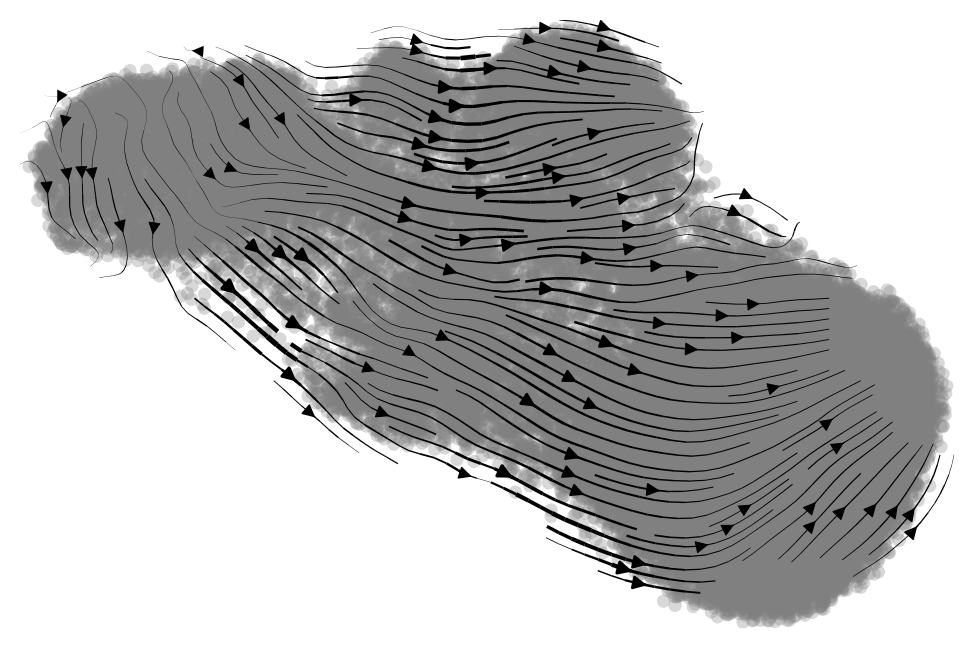

In [30]:
# velocity by atac
mv.velocity_embedding_stream(adata_result, basis='umap',vkey='velo_chrom')

figure cannot be saved as pdf, using png instead (can only output finite numbers in pdf).
saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_multivelo_ATAC_velocity_stream_dPSItested_genes_byCelltype.png


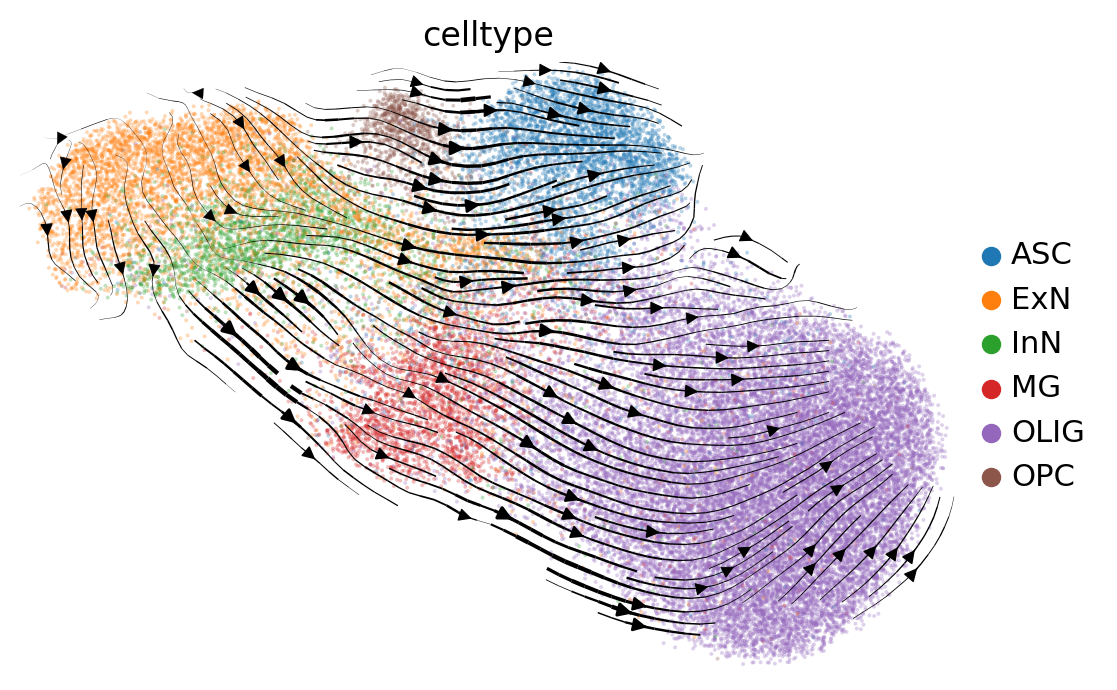

In [31]:
# plot velocity stream by velo_chrom
mv.velocity_embedding_stream(adata_result,color='celltype',size = 8, legend_loc='right margin', basis='umap',vkey='velo_chrom',save='/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_multivelo_ATAC_velocity_stream_dPSItested_genes_byCelltype.pdf')

saving figure to file /athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_latentTime.pdf


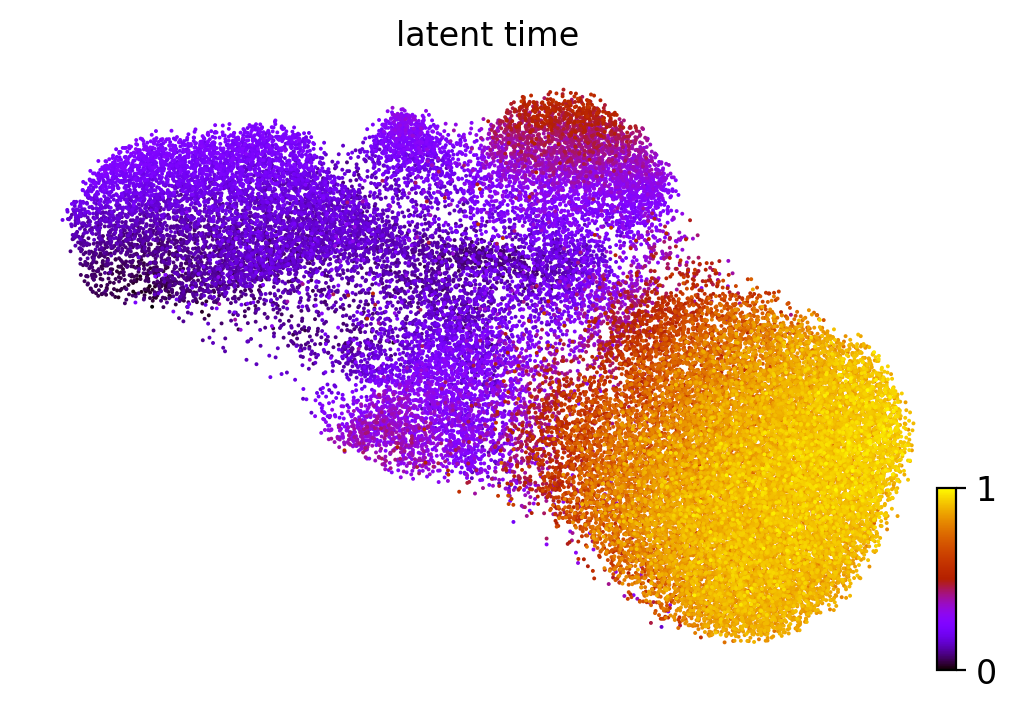

In [32]:
scv.pl.scatter(adata_result, color='latent_time', color_map='gnuplot', size=8, save='/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_latentTime.pdf')

In [33]:
adata_result

AnnData object with n_obs × n_vars = 39898 × 1445
    obs: 'celltype', 'batch', 'n_counts', 'velo_s_norm_self_transition', 'root_cells', 'end_points', 'velo_s_norm_pseudotime', 'latent_time', 'sampleID', 'group', 'sample', 'velo_chrom_norm_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'fit_alpha_c', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_sw1', 'fit_t_sw2', 'fit_t_sw3', 'fit_scale_cc', 'fit_rescale_c', 'fit_rescale_u', 'fit_alignment_scaling', 'fit_model', 'fit_direction', 'fit_loss', 'fit_likelihood', 'fit_likelihood_c', 'fit_ssd_c', 'fit_var_c', 'fit_c0', 'fit_u0', 'fit_s0', 'fit_anchor_min_idx', 'fit_anchor_max_idx', 'fit_anchor_velo_min_idx', 'fit_anchor_velo_max_idx', 'velo_s_genes', 'velo_u_genes', 'velo_chrom_genes', 'velo_s_norm_genes', 'velo_chrom_norm_genes'
    uns: 'celltype_colors', 'log1p', 'neighbors', 'pca', 'umap', 'velo_s_params', 'velo_u_params', 'velo_chrom_params', 'velo_s_norm_params', 'velo_s_norm_graph', 'velo_s_norm_graph_n

In [34]:
# Save the result for use later on
adata_result.write("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_multivelo_dPSItestedGenes.h5ad")

In [3]:
### reload  assay
adata_result = sc.read_h5ad("/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered_controlSamples/All_9Cases_multivelo_dPSItestedGenes.h5ad")

In [35]:
unique_fit_model = set(adata_result.var['fit_model'])

In [36]:
unique_fit_model

{1.0, 2.0}

In [37]:
# get the model 1 genes
adata1 = adata_result[:, adata_result.var['fit_model'].values == 1]
# get the model 2 genes
adata2 = adata_result[:, adata_result.var['fit_model'].values == 2]

In [38]:
adata1.var

Accession Chromosome        End      Start Strand  fit_alpha_c  \
Gene                                                                           
AAK1    ENSG00000115977          2   69674349   69457997      -     0.008353   
ABAT    ENSG00000183044         16    8784575    8674596      +     0.012399   
ABCB9   ENSG00000150967         12  122981649  122920951      -     0.011129   
ABCC1   ENSG00000103222         16   16143074   15949577      +     0.001597   
ABHD12  ENSG00000100997         20   25390835   25294742      -     0.040408   
...                 ...        ...        ...        ...    ...          ...   
ZNF638  ENSG00000075292          2   71435069   71276561      +     0.018650   
ZNF706  ENSG00000120963          8  101206193  101177878      -     0.002509   
ZRANB3  ENSG00000121988          2  135531218  135136916      -     0.005754   
ZSWIM7  ENSG00000214941         17   15999717   15976560      -     0.003319   
ZYX     ENSG00000159840          7  143391111  143381295      +     0.006203   

        fit_alpha  fit_beta  fit_gamma  fit_t_sw1  fit_t_sw2   fit_t_sw3  \
Gene                                                                       
AAK1     1.557989  0.324798   0.346642  -0.775673  11.524872   11.941749   
ABAT     1.764944  0.231622   0.515892  -0.031670   6.533440    7.554519   
ABCB9    0.048887  0.254879   0.055074  10.538346  20.039638   21.565996   
ABCC1    0.168399  0.198760   0.039457  -0.026920  20.017968   22.605863   
ABHD12   0.690675  0.200037   1.035426  -0.006993   1.044206    7.168827   
...           ...       ...        ...        ...        ...         ...   
ZNF638   1.419501  0.393635   0.367670  -0.885850   1.808191    8.559743   
ZNF706   0.111443  0.070827   0.335721  -0.129802  20.091355  102.022472   
ZRANB3   0.066075  0.064714   0.414786  -0.104464  20.175623   85.321101   
ZSWIM7   0.059129  0.259184   0.036801  -0.007073  20.057787   23.461538   
ZYX      0.147027  0.192918   0.059571  -0.015238  20.015925   21.291990   

        fit_scale_cc  fit_rescale_c  fit_rescale_u  fit_alignment_scaling  \
Gene                                                                        
AAK1        0.907700       0.991872       0.683257               3.099379   
ABAT        0.559005       0.991962       0.495217               1.026749   
ABCB9       0.331193       0.750000       0.912712               1.116331   
ABCC1       0.869968       1.000640       1.254491               1.625407   
ABHD12      1.040497       0.926213       0.363250               1.050526   
...              ...            ...            ...                    ...   
ZNF638      0.707539       0.997897       0.735279               1.176887   
ZNF706      1.064718       0.904917       0.648702               5.606742   
ZRANB3      1.004645       0.856200       0.567198               4.577982   
ZSWIM7      1.076843       0.833141       1.608884               2.399038   
ZYX         0.596274       1.158072       0.403235               1.289406   

        fit_model fit_direction  fit_loss  fit_likelihood  fit_likelihood_c  \
Gene                                                                          
AAK1          1.0      complete  0.011805        0.069994          0.254635   
ABAT          1.0      complete  0.001753        0.061988          0.260143   
ABCB9         1.0            on  0.000039        0.016567          0.241897   
ABCC1         1.0            on  0.024155        0.035155          0.250922   
ABHD12        1.0      complete  0.000147        0.017730          0.255112   
...           ...           ...       ...             ...               ...   
ZNF638        1.0      complete  0.006868        0.084413          0.257455   
ZNF706        1.0            on  0.000173        0.012716          0.258550   
ZRANB3        1.0            on  0.000135        0.009864          0.263447   
ZSWIM7        1.0            on  0.000253        0.065000          0.255689   
ZYX           1.0            on  0

In [39]:
adata2.var

Accession Chromosome        End      Start Strand  fit_alpha_c  \
Gene                                                                            
ABCA5    ENSG00000154265         17   69327244   69244311      -     0.005376   
ABR      ENSG00000159842         17    1229738    1003518      -     0.008020   
ACTR2    ENSG00000138071          2   65271253   65227753      +     0.005591   
ADGRL1   ENSG00000072071         19   14206187   14147743      -     0.007494   
ASAH1    ENSG00000104763          8   18084998   18055992      -     0.013137   
BSG      ENSG00000172270         19     583493     571277      +     0.010300   
CALM3    ENSG00000160014         19   46610782   46601074      +     0.013376   
CAMK2A   ENSG00000070808          5  150290291  150219491      -     0.005335   
CAMK2G   ENSG00000148660         10   73874591   73812501      -     0.005956   
CTNND2   ENSG00000169862          5   11904446   10971836      -     0.004540   
DGKZ     ENSG00000149091         11   46380554   46332905      +     0.009737   
DOCK4    ENSG00000128512          7  112206411  111726110      -     0.003899   
ELAVL2   ENSG00000107105          9   23826337   23690104      -     0.002842   
EPB41L2  ENSG00000079819          6  131063322  130839347      -     0.005825   
FYN      ENSG00000010810          6  111873452  111660332      -     0.004943   
GNAI2    ENSG00000114353          3   50259362   50226292      +     0.010061   
KIF5A    ENSG00000155980         12   57586633   57550044      +     0.005456   
LPIN1    ENSG00000134324          2   11827409   11677595      +     0.005985   
MAP2     ENSG00000078018          2  209734118  209424058      +     0.005789   
MAST1    ENSG00000105613         19   12874952   12833951      +     0.005104   
MBNL1    ENSG00000152601          3  152465780  152243828      +     0.005201   
NDRG4    ENSG00000103034         16   58513628   58462846      +     0.012807   
NRXN1    ENSG00000179915          2   51225575   49918503      -     0.003998   
OLFM1    ENSG00000130558          9  135121179  135075422      +     0.007596   
PREPL    ENSG00000138078          2   44361862   44316281      -     0.005604   
TTYH1    ENSG00000167614         19   54436904   54415219      +     0.005215   
VPS35    ENSG00000069329         16   46689518   46656132      -     0.010186   
YWHAB    ENSG00000166913         20   44908532   44885702      +     0.006030   

         fit_alpha  fit_beta  fit_gamma  fit_t_sw1  fit_t_sw2  fit_t_sw3  \
Gene                                                                       
ABCA5     3.778437  0.803155   1.023572  -0.009788  12.063483  12.293607   
ABR       2.305446  0.783597   0.951517   7.518330  11.787114  14.972088   
ACTR2     3.241274  0.733366   0.783124  -0.024346  14.250666  14.577640   
ADGRL1    1.583576  0.686910   0.565018  -0.022140  12.738194  14.527847   
ASAH1     0.875668  0.831944   0.635268  -0.037975  25.289122  28.992914   
BSG       3.001466  0.861562   0.840869  -0.024076   5.382768  23.899186   
CALM3     2.922387  0.732729   0.579578   5.612989  10.264756  34.597432   
CAMK2A   15.618734  0.360994   0.794185   5.447464  11.450939  11.983998   
CAMK2G    5.438441  0.771568   1.117506   6.017722  13.866197  14.212983   
CTNND2    5.148059  0.584592   0.658470   0.013571  15.231986  19.566080   
DGKZ      0.289723  0.740761   0.238064  -0.014964  20.021346  20.330257   
DOCK4     3.659117  0.271708   0.460943 -20.158649  -0.042631  53.464734   
ELAVL2    6.617680  0.550654   0.850435   6.520892  20.022358  20.404171   
EPB41L2   3.322649  0.831086   0.985653  -0.377097  20.020702  20.709534   
FYN       3.686291  1.292534   1.373936  -0.036844  23.325875  23.541331   
GNAI2     1.122716  0.507533   0.390872  -0.108513  10.902467  20.000000   
KIF5A     5.088919  0.623625   0.939187  -0.027899   8.935008  23.533034   
LPIN1     3.810766  0.284016   1.034916  -0.034296  28.676665  31.546480   
MAP2      8.879961  0.809226   1.402842   4.969871  14.963920  1

In [40]:
adata1.obs.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_module1_genes_major.celltypes_dPSItestedGenes_cells.txt', header=True, index=True)
adata1.var.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_module1_genes_major.celltypes_dPSItestedGenes_variable_genes.txt', header=True, index=True)

In [41]:
adata2.obs.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_module2_genes_major.celltypes_dPSItestedGenes_cells.txt', header=True, index=True)
adata2.var.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_module2_genes_major.celltypes_dPSItestedGenes_variable_genes.txt', header=True, index=True)

In [42]:
all_cells = adata_result.obs.index

In [43]:
dPSI_filter_genes = adata_result.var.index

In [44]:
all_cells

Index(['Gan129_AAACAGCCAGAGGGAG-1', 'Gan129_AAACCAACAGCAGGTA-1',
       'Gan129_AAACCGCGTGCGCAAT-1', 'Gan129_AAACCGGCAACACTTG-1',
       'Gan129_AAACCGGCAAGCTTTG-1', 'Gan129_AAACGCGCAGGACACA-1',
       'Gan129_AAACGGATCCCGAAGC-1', 'Gan129_AAACGTACAATGAGGT-1',
       'Gan129_AAAGCCCGTTATCCGT-1', 'Gan129_AAAGCCGCAACTGGGA-1',
       ...
       'Gan50_TTTGGTAAGTCATCCC-1', 'Gan50_TTTGGTGCAGGACCTT-1',
       'Gan50_TTTGTCCCAACAACAA-1', 'Gan50_TTTGTCCCACAGAAAC-1',
       'Gan50_TTTGTCTAGAACAAGT-1', 'Gan50_TTTGTCTAGAATCTCA-1',
       'Gan50_TTTGTCTAGTTTCCTG-1', 'Gan50_TTTGTGGCAGATTCAT-1',
       'Gan50_TTTGTGTTCCCTCAGT-1', 'Gan50_TTTGTTGGTAAGCACC-1'],
      dtype='object', length=39898)

In [45]:
dPSI_filter_genes

Index(['AAK1', 'ABAT', 'ABCA5', 'ABCB9', 'ABCC1', 'ABHD12', 'ABHD6', 'ABI1',
       'ABI2', 'ABL2',
       ...
       'ZNF484', 'ZNF532', 'ZNF568', 'ZNF573', 'ZNF615', 'ZNF638', 'ZNF706',
       'ZRANB3', 'ZSWIM7', 'ZYX'],
      dtype='object', name='Gene', length=1445)

In [46]:
all_cells = adata_result.obs.index
dPSI_filter_genes = adata_result.var.index
state_all = adata_result[:,dPSI_filter_genes].layers['fit_state']
state_all_df = pd.DataFrame(state_all)

In [47]:
state_all_df.index = all_cells
state_all_df.columns = dPSI_filter_genes

In [48]:
state_all_df

Gene                       AAK1  ABAT  ABCA5  ABCB9  ABCC1  ABHD12  ABHD6  \
Gan129_AAACAGCCAGAGGGAG-1   1.0   3.0    3.0    1.0    1.0     3.0    1.0   
Gan129_AAACCAACAGCAGGTA-1   1.0   3.0    1.0    1.0    1.0     2.0    1.0   
Gan129_AAACCGCGTGCGCAAT-1   1.0   1.0    3.0    1.0    1.0     2.0    1.0   
Gan129_AAACCGGCAACACTTG-1   1.0   1.0    1.0    1.0    1.0     1.0    1.0   
Gan129_AAACCGGCAAGCTTTG-1   1.0   1.0    3.0    1.0    1.0     2.0    1.0   
...                         ...   ...    ...    ...    ...     ...    ...   
Gan50_TTTGTCTAGAATCTCA-1    1.0   1.0    3.0    1.0    1.0     2.0    1.0   
Gan50_TTTGTCTAGTTTCCTG-1    1.0   1.0    1.0    1.0    1.0     2.0    1.0   
Gan50_TTTGTGGCAGATTCAT-1    1.0   1.0    1.0    1.0    1.0     2.0    1.0   
Gan50_TTTGTGTTCCCTCAGT-1    1.0   1.0    3.0    1.0    1.0     2.0    1.0   
Gan50_TTTGTTGGTAAGCACC-1    1.0   1.0    3.0    1.0    1.0     3.0    1.0   

Gene                       ABI1  ABI2  ABL2  ABLIM2  ABR  ACAA1  ACACB  \
Gan129_AAACAGCCAGAGGGAG-1   2.0   1.0   2.0     1.0  1.0    1.0    1.0   
Gan129_AAACCAACAGCAGGTA-1   2.0   1.0   2.0     1.0  1.0    1.0    1.0   
Gan129_AAACCGCGTGCGCAAT-1   2.0   1.0   2.0     1.0  1.0    1.0    2.0   
Gan129_AAACCGGCAACACTTG-1   2.0   1.0   2.0     1.0  1.0    1.0    2.0   
Gan129_AAACCGGCAAGCTTTG-1   2.0   1.0   2.0     1.0  1.0    1.0    1.0   
...                         ...   ...   ...     ...  ...    ...    ...   
Gan50_TTTGTCTAGAATCTCA-1    2.0   1.0   2.0     1.0  1.0    1.0    2.0   
Gan50_TTTGTCTAGTTTCCTG-1    2.0   1.0   2.0     1.0  1.0    1.0    1.0   
Gan50_TTTGTGGCAGATTCAT-1    2.0   1.0   2.0     1.0  1.0    1.0    1.0   
Gan50_TTTGTGTTCCCTCAGT-1    2.0   1.0   2.0     1.0  1.0    1.0    3.0   
Gan50_TTTGTTGGTAAGCACC-1    1.0   1.0   2.0     1.0  0.0    1.0    1.0   

Gene                       ACADSB  ACAP2  ACAP3  ACD  ACER3  ACO2  ACOT8  \
Gan129_AAACAGCCAGAGGGAG-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan129_AAACCAACAGCAGGTA-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan129_AAACCGCGTGCGCAAT-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan129_AAACCGGCAACACTTG-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan129_AAACCGGCAAGCTTTG-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
...                           ...    ...    ...  ...    ...   ...    ...   
Gan50_TTTGTCTAGAATCTCA-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan50_TTTGTCTAGTTTCCTG-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan50_TTTGTGGCAGATTCAT-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan50_TTTGTGTTCCCTCAGT-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan50_TTTGTTGGTAAGCACC-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   

Gene                       ACOT9  ACOX3  ACSL3  ACTN1  ACTN4  ACTR2  ACTR3B  \
Gan129_AAACAGCCAGAGGGAG-1    1.0    1.0    3.0    1.0    2.0    3.0     1.0   
Gan129_AAACCAACAGCAGGTA-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan129_AAACCGCGTGCGCAAT-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan129_AAACCGGCAACACTTG-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan129_AAACCGGCAAGCTTTG-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
...                          ...    ...    ...    ...    ...    ...     ...   
Gan50_TTTGTCTAGAATCTCA-1     1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan50_TTTGTCTAGTTTCCTG-1     1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan50_TTTGTGGCAGATTCAT-1     1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan50_TTTGTGTTCCCTCAGT-1     1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan50_TTTGTTGGTAAGCACC-1     1.0    1.0    2.0    0.0    2.0    1.0     1.0   

Gene                       ACVR2A  ADAM10  ADAM22  ADD1  ADD3  ADGRB3  ADGRL1  \
Gan129_AAACAGCCAGAGGGAG-1     2.0     1.0     2.0   2.0   1.0     3.0     2.0   
Gan129_AAACCAACAGCAGGTA-1     2.0     2.0     3.0   2.0   1.0     3.0     1.0   
Gan129_AAACCGCGTGCGCAAT-1     2.0     1.0     3.0   2.0   2.0     2.0     1.0   


In [49]:
state_all_df.min()

Gene
AAK1      1.0
ABAT      1.0
ABCA5     1.0
ABCB9     0.0
ABCC1     1.0
         ... 
ZNF638    1.0
ZNF706    1.0
ZRANB3    1.0
ZSWIM7    1.0
ZYX       1.0
Length: 1445, dtype: float64

In [50]:
# save the state matrix, index = cellID, header = geneName
state_all_df.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_multivelo_dPSItestedGenes_Cell_States_mtx.csv')

In [4]:
adata_result.obs

celltype batch   n_counts  \
Gan129_AAACAGCCAGAGGGAG-1      ExN     0  85.000000   
Gan129_AAACCAACAGCAGGTA-1     OLIG     0  85.000015   
Gan129_AAACCGCGTGCGCAAT-1     OLIG     0  85.000000   
Gan129_AAACCGGCAACACTTG-1      ExN     0  85.000008   
Gan129_AAACCGGCAAGCTTTG-1       MG     0  85.000000   
...                            ...   ...        ...   
Gan50_TTTGTCTAGAATCTCA-1       ASC     0  84.999992   
Gan50_TTTGTCTAGTTTCCTG-1        MG     0  85.000000   
Gan50_TTTGTGGCAGATTCAT-1      OLIG     0  85.000000   
Gan50_TTTGTGTTCCCTCAGT-1       InN     0  85.000000   
Gan50_TTTGTTGGTAAGCACC-1      OLIG     0  85.000000   

                           velo_s_norm_self_transition  root_cells  \
Gan129_AAACAGCCAGAGGGAG-1                     0.042240    0.000002   
Gan129_AAACCAACAGCAGGTA-1                     0.109465    0.000014   
Gan129_AAACCGCGTGCGCAAT-1                     0.114712    0.499994   
Gan129_AAACCGGCAACACTTG-1                     0.111342    0.000006   
Gan129_AAACCGGCAAGCTTTG-1                     0.109355    0.490023   
...                                                ...         ...   
Gan50_TTTGTCTAGAATCTCA-1                      0.107732    0.001623   
Gan50_TTTGTCTAGTTTCCTG-1                      0.045689    0.000002   
Gan50_TTTGTGGCAGATTCAT-1                      0.075847    0.000019   
Gan50_TTTGTGTTCCCTCAGT-1                      0.000000    0.499994   
Gan50_TTTGTTGGTAAGCACC-1                      0.086423    0.979983   

                           end_points  velo_s_norm_pseudotime  latent_time  \
Gan129_AAACAGCCAGAGGGAG-1    0.200448                0.149493     0.087144   
Gan129_AAACCAACAGCAGGTA-1    0.004686                0.152697     0.370102   
Gan129_AAACCGCGTGCGCAAT-1    0.001077                0.178406     0.254628   
Gan129_AAACCGGCAACACTTG-1    0.002610                0.201443     0.255577   
Gan129_AAACCGGCAAGCTTTG-1    0.029152                0.197042     0.365337   
...                               ...                     ...          ...   
Gan50_TTTGTCTAGAATCTCA-1     0.000390                0.145112     0.223266   
Gan50_TTTGTCTAGTTTCCTG-1     1.000000                0.343973     0.152546   
Gan50_TTTGTGGCAGATTCAT-1     0.125415                0.139047     0.485681   
Gan50_TTTGTGTTCCCTCAGT-1     0.000055                0.104904     0.096804   
Gan50_TTTGTTGGTAAGCACC-1     0.037336                0.168679     0.835508   

                          sampleID group  sample  \
Gan129_AAACAGCCAGAGGGAG-1   Gan129  Case  Gan129   
Gan129_AAACCAACAGCAGGTA-1   Gan129  Case  Gan129   
Gan129_AAACCGCGTGCGCAAT-1   Gan129  Case  Gan129   
Gan129_AAACCGGCAACACTTG-1   Gan129  Case  Gan129   
Gan129_AAACCGGCAAGCTTTG-1   Gan129  Case  Gan129   
...                            ...   ...     ...   
Gan50_TTTGTCTAGAATCTCA-1     Gan50  Case   Gan50   
Gan50_TTTGTCTAGTTTCCTG-1     Gan50  Case   Gan50   
Gan50_TTTGTGGCAGATTCAT-1     Gan50  Case   Gan50   
Gan50_TTTGTGTTCCCTCAGT-1     Gan50  Case   Gan50   
Gan50_TTTGTTGGTAAGCACC-1     Gan50  Case   Gan50   

                           velo_chrom_norm_self_transition  
Gan129_AAACAGCCAGAGGGAG-1                         0.092378  
Gan129_AAACCAACAGCAGGTA-1                         0.044461  
Gan129_AAACCGCGTGCGCAAT-1                         0.075277  
Gan129_AAACCGGCAACACTTG-1                         0.117943  
Gan129_AAACCGGCAAGCTTTG-1                         0.088497  
...                                                    ...  
Gan50_TTTGTCTAGAATCTCA-1                          0.102287  
Gan50_TTTGTCTAGTTTCCTG-1                          0.090267  
Gan50_TTTGTGGCAGATTCAT-1                          0.065075  
Gan50_TTTGTGTTCCCTCAGT-1                          0.012722  
Gan50_TTTGTTGGTAAGCACC-1                          0.068159  

[39898 rows x 12 columns]

In [5]:
adata_result_exn = adata_result[adata_result.obs['celltype'] == "ExN"]

In [6]:
exn_cells = adata_result_exn.obs.index
dPSI_filter_genes = adata_result.var.index
state_exn = adata_result[exn_cells,dPSI_filter_genes].layers['fit_state']
state_exn_df = pd.DataFrame(state_exn)
state_exn_df.index = exn_cells
state_exn_df.columns = dPSI_filter_genes

In [7]:
state_exn_df

Gene                       AAK1  ABAT  ABCA5  ABCB9  ABCC1  ABHD12  ABHD6  \
Gan129_AAACAGCCAGAGGGAG-1   1.0   3.0    3.0    1.0    1.0     3.0    1.0   
Gan129_AAACCGGCAACACTTG-1   1.0   1.0    1.0    1.0    1.0     1.0    1.0   
Gan129_AACTCACAGTCACTAA-1   3.0   1.0    3.0    1.0    1.0     2.0    1.0   
Gan129_AACTGTTCAATAACCT-1   1.0   1.0    1.0    1.0    1.0     2.0    1.0   
Gan129_AAGCCTGTCACACAGT-1   1.0   3.0    1.0    1.0    1.0     2.0    1.0   
...                         ...   ...    ...    ...    ...     ...    ...   
Gan50_TTTGACCGTCTATCGT-1    1.0   1.0    3.0    1.0    1.0     2.0    1.0   
Gan50_TTTGACTTCTTGATGA-1    1.0   3.0    1.0    1.0    1.0     3.0    1.0   
Gan50_TTTGCGACATTATGCG-1    1.0   3.0    3.0    1.0    1.0     3.0    1.0   
Gan50_TTTGGCTGTCACAGCG-1    1.0   1.0    3.0    1.0    1.0     2.0    1.0   
Gan50_TTTGTCCCAACAACAA-1    1.0   1.0    3.0    1.0    1.0     2.0    1.0   

Gene                       ABI1  ABI2  ABL2  ABLIM2  ABR  ACAA1  ACACB  \
Gan129_AAACAGCCAGAGGGAG-1   2.0   1.0   2.0     1.0  1.0    1.0    1.0   
Gan129_AAACCGGCAACACTTG-1   2.0   1.0   2.0     1.0  1.0    1.0    2.0   
Gan129_AACTCACAGTCACTAA-1   2.0   1.0   2.0     1.0  1.0    1.0    1.0   
Gan129_AACTGTTCAATAACCT-1   2.0   1.0   2.0     1.0  1.0    1.0    1.0   
Gan129_AAGCCTGTCACACAGT-1   2.0   1.0   2.0     1.0  1.0    1.0    1.0   
...                         ...   ...   ...     ...  ...    ...    ...   
Gan50_TTTGACCGTCTATCGT-1    2.0   1.0   2.0     1.0  1.0    1.0    1.0   
Gan50_TTTGACTTCTTGATGA-1    2.0   1.0   2.0     1.0  2.0    1.0    1.0   
Gan50_TTTGCGACATTATGCG-1    2.0   1.0   2.0     1.0  2.0    1.0    1.0   
Gan50_TTTGGCTGTCACAGCG-1    2.0   1.0   2.0     1.0  1.0    1.0    1.0   
Gan50_TTTGTCCCAACAACAA-1    2.0   1.0   2.0     1.0  2.0    1.0    1.0   

Gene                       ACADSB  ACAP2  ACAP3  ACD  ACER3  ACO2  ACOT8  \
Gan129_AAACAGCCAGAGGGAG-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan129_AAACCGGCAACACTTG-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan129_AACTCACAGTCACTAA-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan129_AACTGTTCAATAACCT-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan129_AAGCCTGTCACACAGT-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
...                           ...    ...    ...  ...    ...   ...    ...   
Gan50_TTTGACCGTCTATCGT-1      1.0    1.0    1.0  1.0    1.0   1.0    1.0   
Gan50_TTTGACTTCTTGATGA-1      1.0    1.0    1.0  1.0    1.0   1.0    1.0   
Gan50_TTTGCGACATTATGCG-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan50_TTTGGCTGTCACAGCG-1      1.0    1.0    1.0  1.0    1.0   1.0    1.0   
Gan50_TTTGTCCCAACAACAA-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   

Gene                       ACOT9  ACOX3  ACSL3  ACTN1  ACTN4  ACTR2  ACTR3B  \
Gan129_AAACAGCCAGAGGGAG-1    1.0    1.0    3.0    1.0    2.0    3.0     1.0   
Gan129_AAACCGGCAACACTTG-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan129_AACTCACAGTCACTAA-1    1.0    1.0    2.0    1.0    1.0    1.0     1.0   
Gan129_AACTGTTCAATAACCT-1    1.0    1.0    2.0    1.0    2.0    2.0     1.0   
Gan129_AAGCCTGTCACACAGT-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
...                          ...    ...    ...    ...    ...    ...     ...   
Gan50_TTTGACCGTCTATCGT-1     1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan50_TTTGACTTCTTGATGA-1     1.0    1.0    3.0    1.0    2.0    3.0     1.0   
Gan50_TTTGCGACATTATGCG-1     1.0    1.0    3.0    1.0    2.0    1.0     1.0   
Gan50_TTTGGCTGTCACAGCG-1     1.0    1.0    1.0    1.0    2.0    1.0     1.0   
Gan50_TTTGTCCCAACAACAA-1     1.0    1.0    2.0    1.0    2.0    1.0     1.0   

Gene                       ACVR2A  ADAM10  ADAM22  ADD1  ADD3  ADGRB3  ADGRL1  \
Gan129_AAACAGCCAGAGGGAG-1     2.0     1.0     2.0   2.0   1.0     3.0     2.0   
Gan129_AAACCGGCAACACTTG-1     3.0     1.0     3.0   2.0   2.0     2.0     1.0   
Gan129_AACTCACAGTCACTAA-1     3.0     2.0     3.0   2.0   1.0     3.0     1.0   


In [8]:
# save the state matrix, index = cellID, header = geneName
state_exn_df.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_multivelo_dPSItestedGenes_ExN_Cell_States_mtx.csv')

In [9]:
adata_result_oligo = adata_result[adata_result.obs['celltype'] == "OLIG"]
oligo_cells = adata_result_oligo.obs.index
dPSI_filter_genes = adata_result.var.index
state_oligo = adata_result[oligo_cells,dPSI_filter_genes].layers['fit_state']
state_oligo_df = pd.DataFrame(state_oligo)
state_oligo_df.index = oligo_cells
state_oligo_df.columns = dPSI_filter_genes

In [10]:
state_oligo_df

Gene                       AAK1  ABAT  ABCA5  ABCB9  ABCC1  ABHD12  ABHD6  \
Gan129_AAACCAACAGCAGGTA-1   1.0   3.0    1.0    1.0    1.0     2.0    1.0   
Gan129_AAACCGCGTGCGCAAT-1   1.0   1.0    3.0    1.0    1.0     2.0    1.0   
Gan129_AAACGCGCAGGACACA-1   1.0   1.0    3.0    1.0    1.0     2.0    1.0   
Gan129_AAACGTACAATGAGGT-1   1.0   1.0    3.0    1.0    1.0     2.0    1.0   
Gan129_AAAGCCGCAACTGGGA-1   1.0   1.0    3.0    1.0    1.0     3.0    1.0   
...                         ...   ...    ...    ...    ...     ...    ...   
Gan50_TTTGGCTGTTTAACGG-1    1.0   3.0    1.0    1.0    1.0     2.0    1.0   
Gan50_TTTGGTAAGTCATCCC-1    1.0   3.0    3.0    1.0    1.0     3.0    1.0   
Gan50_TTTGTCTAGAACAAGT-1    1.0   3.0    3.0    1.0    1.0     2.0    1.0   
Gan50_TTTGTGGCAGATTCAT-1    1.0   1.0    1.0    1.0    1.0     2.0    1.0   
Gan50_TTTGTTGGTAAGCACC-1    1.0   1.0    3.0    1.0    1.0     3.0    1.0   

Gene                       ABI1  ABI2  ABL2  ABLIM2  ABR  ACAA1  ACACB  \
Gan129_AAACCAACAGCAGGTA-1   2.0   1.0   2.0     1.0  1.0    1.0    1.0   
Gan129_AAACCGCGTGCGCAAT-1   2.0   1.0   2.0     1.0  1.0    1.0    2.0   
Gan129_AAACGCGCAGGACACA-1   2.0   1.0   2.0     1.0  3.0    1.0    1.0   
Gan129_AAACGTACAATGAGGT-1   1.0   1.0   2.0     1.0  3.0    1.0    1.0   
Gan129_AAAGCCGCAACTGGGA-1   1.0   1.0   2.0     1.0  0.0    1.0    1.0   
...                         ...   ...   ...     ...  ...    ...    ...   
Gan50_TTTGGCTGTTTAACGG-1    2.0   1.0   2.0     1.0  1.0    1.0    2.0   
Gan50_TTTGGTAAGTCATCCC-1    2.0   1.0   2.0     1.0  1.0    1.0    3.0   
Gan50_TTTGTCTAGAACAAGT-1    2.0   1.0   2.0     1.0  1.0    1.0    2.0   
Gan50_TTTGTGGCAGATTCAT-1    2.0   1.0   2.0     1.0  1.0    1.0    1.0   
Gan50_TTTGTTGGTAAGCACC-1    1.0   1.0   2.0     1.0  0.0    1.0    1.0   

Gene                       ACADSB  ACAP2  ACAP3  ACD  ACER3  ACO2  ACOT8  \
Gan129_AAACCAACAGCAGGTA-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan129_AAACCGCGTGCGCAAT-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan129_AAACGCGCAGGACACA-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan129_AAACGTACAATGAGGT-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan129_AAAGCCGCAACTGGGA-1     1.0    1.0    1.0  1.0    2.0   1.0    1.0   
...                           ...    ...    ...  ...    ...   ...    ...   
Gan50_TTTGGCTGTTTAACGG-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan50_TTTGGTAAGTCATCCC-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan50_TTTGTCTAGAACAAGT-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan50_TTTGTGGCAGATTCAT-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   
Gan50_TTTGTTGGTAAGCACC-1      1.0    1.0    1.0  1.0    2.0   1.0    1.0   

Gene                       ACOT9  ACOX3  ACSL3  ACTN1  ACTN4  ACTR2  ACTR3B  \
Gan129_AAACCAACAGCAGGTA-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan129_AAACCGCGTGCGCAAT-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan129_AAACGCGCAGGACACA-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan129_AAACGTACAATGAGGT-1    1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan129_AAAGCCGCAACTGGGA-1    1.0    1.0    2.0    0.0    2.0    1.0     1.0   
...                          ...    ...    ...    ...    ...    ...     ...   
Gan50_TTTGGCTGTTTAACGG-1     1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan50_TTTGGTAAGTCATCCC-1     1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan50_TTTGTCTAGAACAAGT-1     1.0    1.0    1.0    1.0    2.0    1.0     1.0   
Gan50_TTTGTGGCAGATTCAT-1     1.0    1.0    2.0    1.0    2.0    1.0     1.0   
Gan50_TTTGTTGGTAAGCACC-1     1.0    1.0    2.0    0.0    2.0    1.0     1.0   

Gene                       ACVR2A  ADAM10  ADAM22  ADD1  ADD3  ADGRB3  ADGRL1  \
Gan129_AAACCAACAGCAGGTA-1     2.0     2.0     3.0   2.0   1.0     3.0     1.0   
Gan129_AAACCGCGTGCGCAAT-1     2.0     1.0     3.0   2.0   2.0     2.0     1.0   
Gan129_AAACGCGCAGGACACA-1     2.0     2.0     3.0   2.0   2.0     3.0     1.0   


In [11]:
# save the state matrix, index = cellID, header = geneName
state_oligo_df.to_csv('/athena/tilgnerlab/scratch/weh4002/Multivelo/wnn/dPSI_genes_filtered/All_9Cases_multivelo_dPSItestedGenes_OLIGO_Cell_States_mtx.csv')